# Assignment 4
&copy; 2023, Scripnic Dinu, all rights reserved

In [445]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

## Data analysis
### General information

Dataframe shape:  (13611, 17)
Dataframe columns:  Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  f

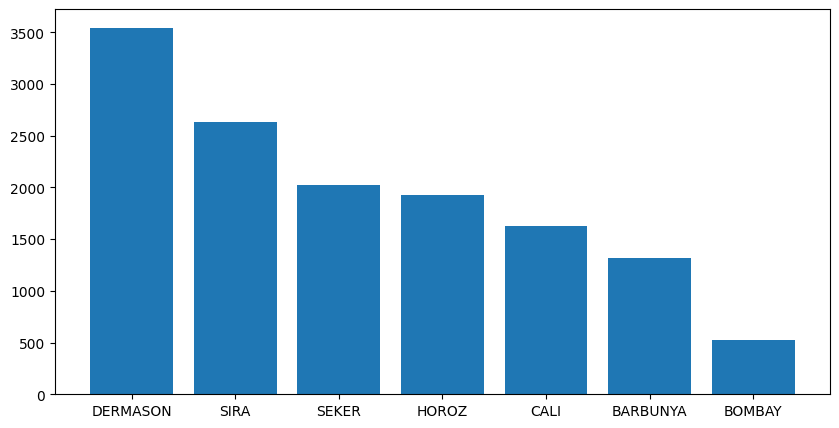

Dataframe boxplot:


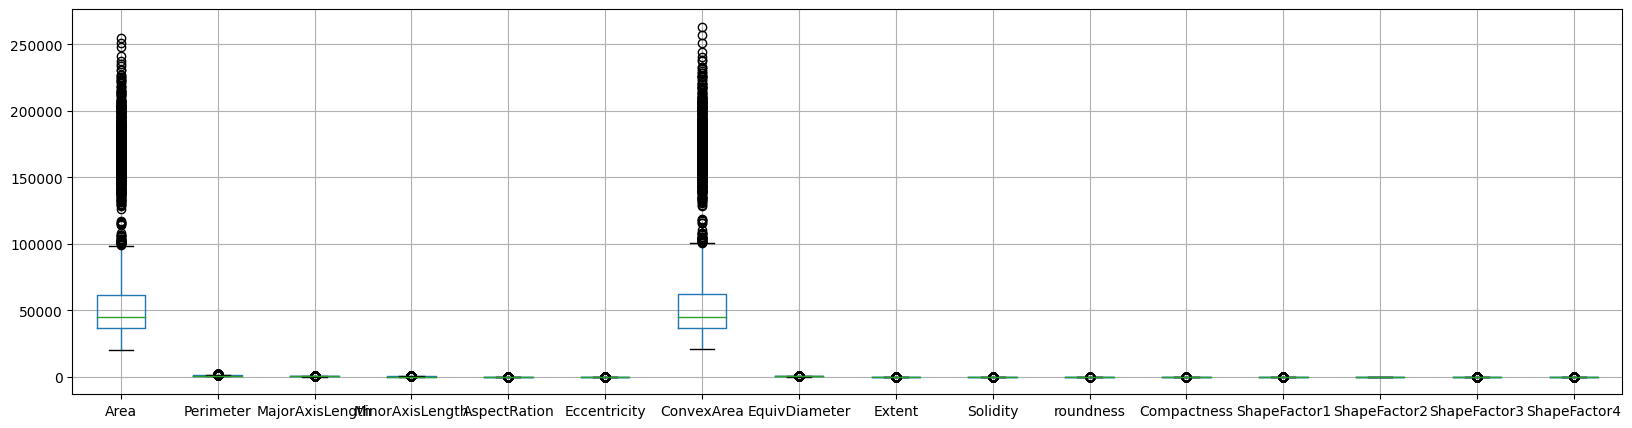

In [446]:
df = pd.read_csv('Lecture_10_Dry_Bean_Dataset.csv')
print('Dataframe shape: ', df.shape)
print('Dataframe columns: ', df.columns)
print('Dataframe info: ', df.info())
print('Dataframe describe: ', df.describe())
print('Dataframe head: ', df.head())
print('Dataframe null values: ', df.isnull().sum())
print('Datarame duplicated values: ', df.duplicated().sum())
print('Dataframe data types: ', df.dtypes)
print('Dataframe statistics: ', df.describe())
print('Dataframe class values: ', df['Class'].unique())
print('Dataframe class values count: ', df['Class'].value_counts())
print('Dataframe class values count plot:')
plt.figure(figsize=(10, 5))
plt.bar(df['Class'].value_counts().index, df['Class'].value_counts().values)
plt.show()
print('Dataframe boxplot:')
X = df.drop('Class', axis=1)
X.boxplot(figsize=(20, 5))
plt.show()


* The data is very unbalanced as we can see from the bar chart.
* Also the data is not normalized, as we can see from the box plot.
* Also there are quite many features, we should inspect their importance and correlation.

### Data balancing

Initial size of y: 13611


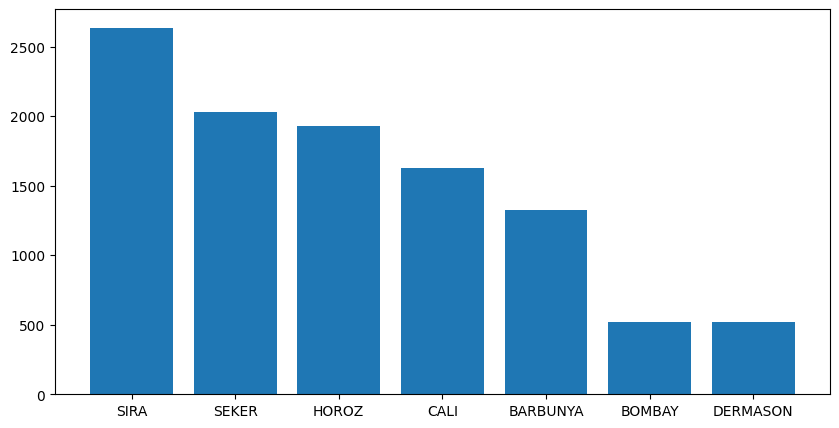

New size of y: 10587


In [447]:
X = df.drop('Class', axis=1)
y = df['Class']
print(f'Initial size of y: {len(y)}')
undersampler = RandomUnderSampler(sampling_strategy='majority')
X, y = undersampler.fit_resample(X, y)
plt.figure(figsize=(10, 5))
plt.bar(y.value_counts().index, y.value_counts().values)
plt.show()
print(f'New size of y: {len(y)}')

* In order to solve the unbalanced data problem i used Undersampling, 
* I lost around 3k values but now it is suposed to be more balanced.
* Using oversampling would just add duplicates that i just deleted, so its kinda dumb.
* Other strategies for Undersampling deletes too many values, so i think this is the best option.


### Data normalization and outlier removal

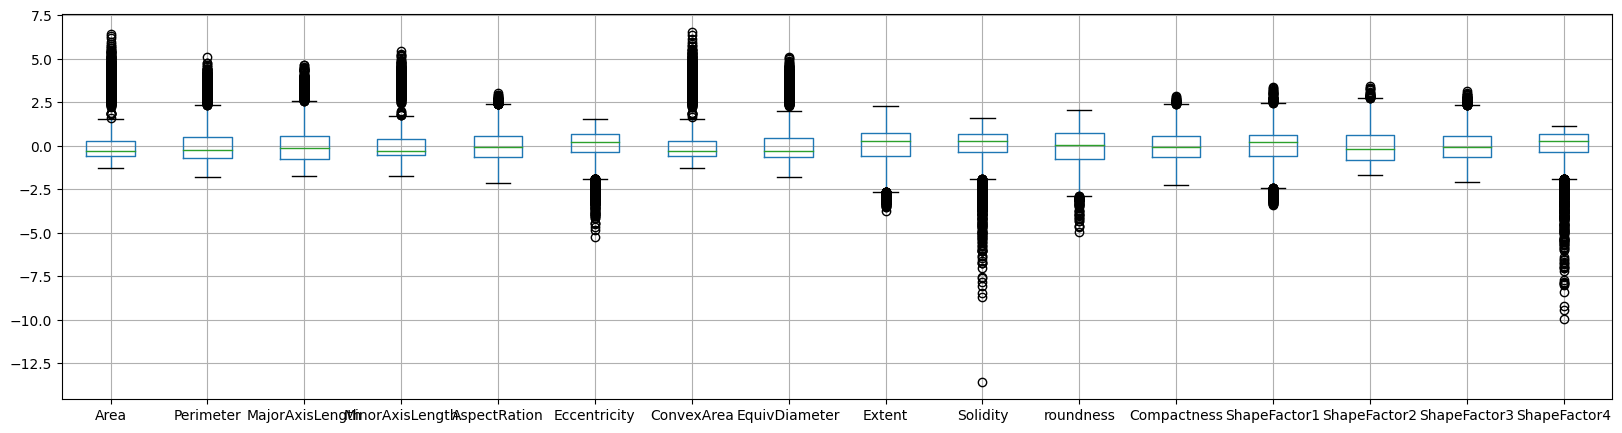

(10587, 16)
Index([    1,     3,     4,     5,     6,     7,     8,     9,    10,    11,
       ...
       10577, 10578, 10579, 10580, 10581, 10582, 10583, 10584, 10585, 10586],
      dtype='int64', length=7880)


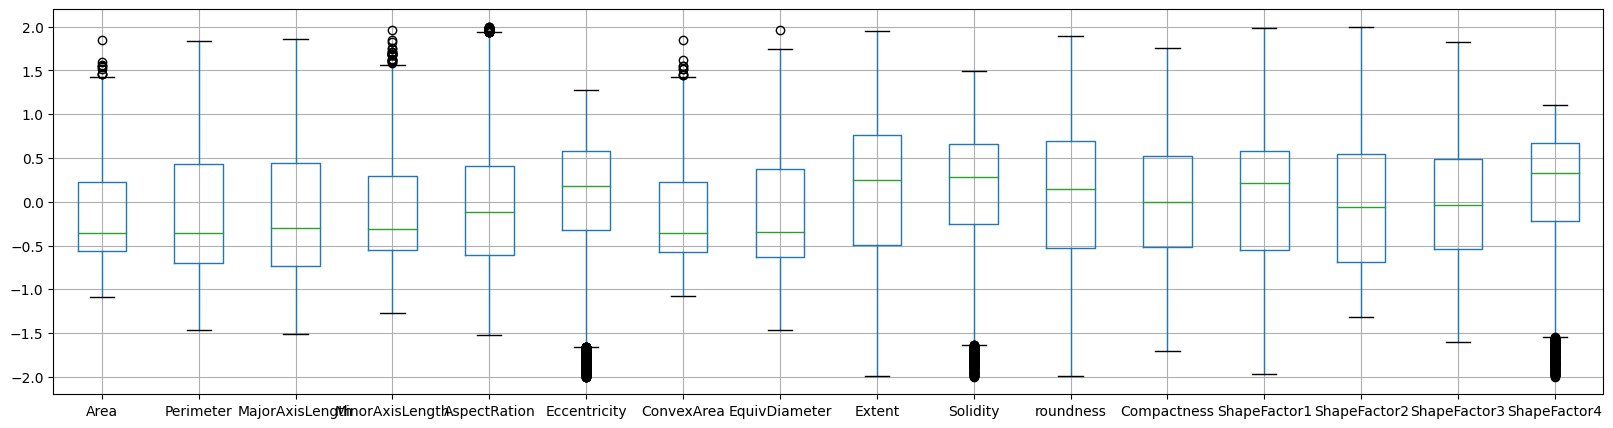

(7880, 16)
(7880,)


In [448]:
Xscaled = StandardScaler().fit_transform(X)
X = pd.DataFrame(Xscaled, columns=X.columns)
X.boxplot(figsize=(20, 5))
plt.show()
print(X.shape)
# remove outliers that are more than 2 standard deviations from the mean
X:pd.DataFrame = X[(np.abs(X) < 2).all(axis=1)]
indexes = X.index
print(indexes)
y = y[indexes]
X.boxplot(figsize=(20, 5))
plt.show()
print(X.shape)
print(y.shape)

* After the rescaling we can see that we have quite some outliers, but the data is more normalized.
* To get rid of most the outliers i removed all the points that are 2 standard deviations away from the mean.
* Now we have 7900 values, but data is more normalized and we have less outliers.

### Feature Selection

                     Area  Perimeter  MajorAxisLength  MinorAxisLength   
Area             1.000000   0.984241         0.933183         0.886624  \
Perimeter        0.984241   1.000000         0.959040         0.831552   
MajorAxisLength  0.933183   0.959040         1.000000         0.669431   
MinorAxisLength  0.886624   0.831552         0.669431         1.000000   
AspectRation     0.406367   0.501536         0.704513        -0.049145   
Eccentricity     0.441546   0.529099         0.712454         0.001477   
ConvexArea       0.999920   0.985129         0.933122         0.886636   
EquivDiameter    0.997652   0.989012         0.940827         0.881082   
Extent          -0.005897  -0.047046        -0.071854         0.076381   
Solidity        -0.376940  -0.454433        -0.385928        -0.299469   
roundness       -0.597118  -0.723021        -0.749168        -0.302746   
Compactness     -0.434628  -0.526445        -0.723100         0.019180   
ShapeFactor1    -0.855620  -0.801633  

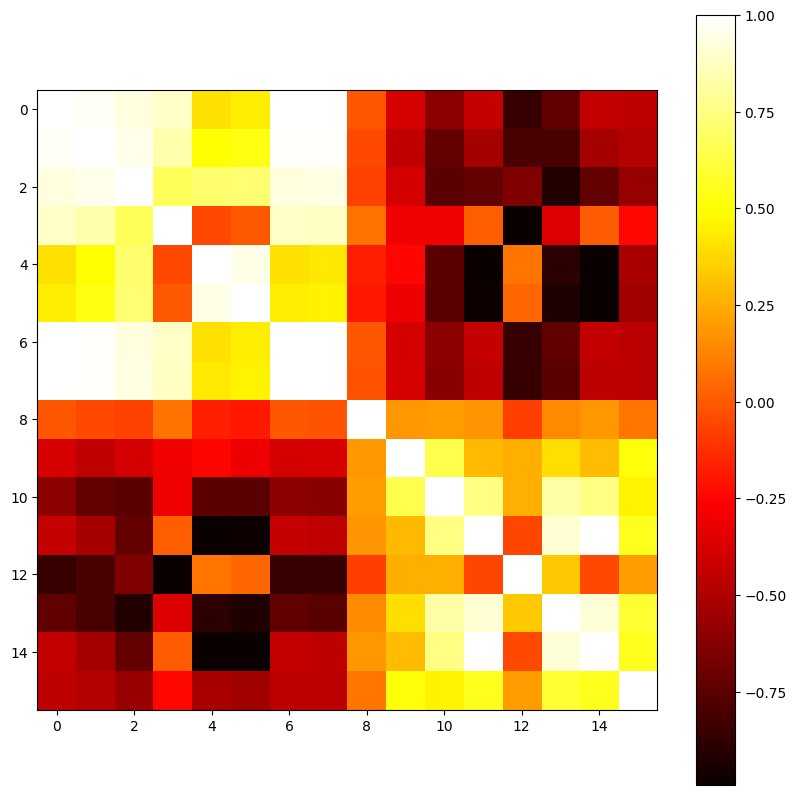

In [449]:
correlation = X.corr()
print(correlation)
plt.figure(figsize=(10, 10))
plt.imshow(correlation, cmap='hot')
plt.colorbar()
plt.show()


* Correlation analysis:   
    * Area and ConvexArea (correlation coefficient: 0.999920)
    * Area and EquivDiameter (correlation coefficient: 0.997657)
    * Perimeter and EquivDiameter (correlation coefficient: 0.988937)
    * MajorAxisLength and EquivDiameter (correlation coefficient: 0.940396)
    * AspectRatio and Eccentricity (correlation coefficient: 0.951508)
    * Compactness and AspectRatio (correlation coefficient: -0.991117)
* Because Area has high correlation with ConvexArea and EquivDiameter, but ConvexArea and EquivDiameter don't have high correlation between them, i will remove Area.
* Because Perimeter has high correlation with EquivDiameter, but EquivDiameter have also high correlation with MajorAxisLength, i will remove EquivDiameter.
* Hi i am from the future:
    * Area has low importance so good i removed it.
    * same as equivdiameter.

Random Forest train accuracy:  1.0
Random Forest test accuracy:  0.9238578680203046


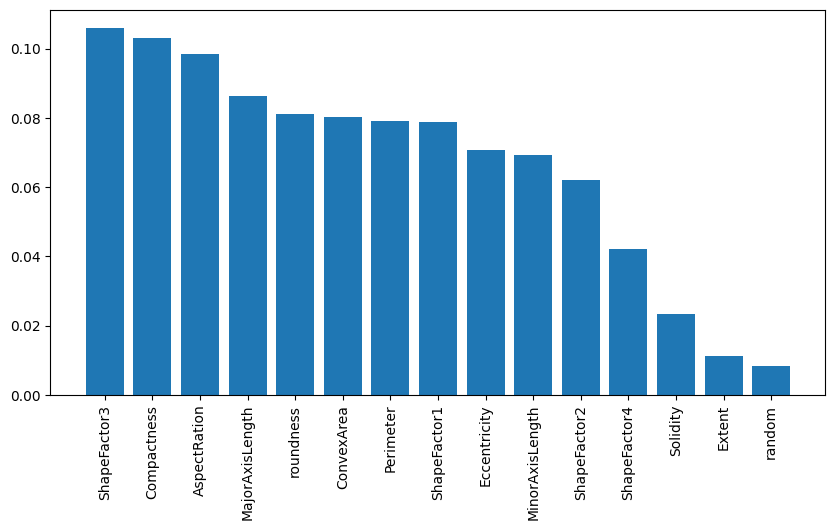

In [450]:
X = X.drop(['Area', 'EquivDiameter'], axis=1)
X['random'] = np.random.random(size=len(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Random Forest train accuracy: ', rf.score(X_train, y_train))
print('Random Forest test accuracy: ', rf.score(X_test, y_test))
importances = rf.feature_importances_
importances = pd.DataFrame(importances, index=X.columns, columns=['Importance'])
importances = importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(importances.index, importances['Importance'])
plt.xticks(rotation=90)
plt.show()

* Solidity and Extent have low correlation with the target, close to random, so i will remove them.
* Also ShapeFactor4 is much lower than other features, so i will remove it.

## PyTorch

In [451]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler 

### Data Preparation
* I will do all data manipulations based on the knowledge i have from the EDA.

In [ ]:
df = pd.read_csv('Lecture_10_Dry_Bean_Dataset.csv')
df['Class'] = df['Class'].astype('category').cat.codes  # convert to categorical codes
X = df.drop('Class', axis=1)
y = df['Class']
undersampler = RandomUnderSampler(sampling_strategy='majority')
X, y = undersampler.fit_resample(X, y)
scaler = StandardScaler()
# Xscaled = StandardScaler().fit_transform(X)
# X = pd.DataFrame(Xscaled, columns=X.columns)
# remove outliers that are more than 2 standard deviations from the mean
# X:pd.DataFrame = X[(np.abs(X) < 2).all(axis=1)]
# indexes = X.index
# y = y[indexes]
X = X.drop(['Area', 'EquivDiameter', 'Solidity', 'Extent', 'ShapeFactor4'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = scaler.fit_transform(X_train)
X_train = X_train[(np.abs(X) < 2).all(axis=1)]
indexes = X_train.index
y_train = y_train[indexes]
X_test = scaler.transform(X_test)
X_train_tensor = torch.Tensor(X_train.values).float()
y_train_tensor = torch.Tensor(y_train.values).long()
X_test_tensor = torch.Tensor(X_test.values).float()
y_test_tensor = torch.Tensor(y_test.values).long()
# set devices
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

* First I wll load the data
* Then I will convert the "Class" column to categorical codes
* I will divide into features and target
* Then with perform feature selection based on the knowledge from EDA. This will consist of:
    * Undersampling to balance the data
    * Standard scaling to normalize the data
    * Removing outliers
    * Removing features with high correlation
    * Removing features with low importance
* Then just split into train and test
* Then convert to tensors

In [453]:
def plot_learning_curve(history: dict) -> None:
    """
    Creates 2 plots: loss and accuracy
    On both plots it is shown the curves for train and test data
    Test data is blue and train data is red
    Also i use line+marker

    Args:
        history (pd.DataFrame): dataframe with columns: ['epoch','loss_train','loss_test','accuracy_train','accuracy_test']
    """
    # create the plots
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    # create the loss curve
    ax[0].plot(history['epochs'], history['loss_train'], marker='o', label='train')
    ax[0].plot(history['epochs'], history['loss_test'], marker='o', label='test')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Loss')
    ax[0].legend()

    # create the accuracy curve
    ax[1].plot(history['epochs'], history['accuracy_train'], marker='o', label='train')
    ax[1].plot(history['epochs'], history['accuracy_test'], marker='o', label='test')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Accuracy')
    ax[1].legend()

    # show my pice of art
    plt.show()
    

In [454]:
class NeuralNetworkTorch(nn.Module):
    
    def __init__(self, input:int, layer1:int, layer2:int, output:int) -> None:
        super(NeuralNetworkTorch, self).__init__()
        self.fc_layers = nn.Sequential(
            nn.Linear(input, layer1),
            nn.ReLU(),
            nn.Linear(layer1, layer2),
            nn.ReLU(),
            nn.Linear(layer2, output),
            nn.Softmax(dim=1)
        )
        
    def forward(self, x):
        return self.fc_layers(x)


In [455]:
model = NeuralNetworkTorch(input=X_train_tensor.shape[1], layer1=32, layer2=16, output=7)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

* Complex NN in our case overfit very much the data and in the learning curve we can see that the test loss and accuracy are not improving, so i will use a simple NN.
* Also very simple NNs without hidden layers are not learning anything, so i will use a simple NN with 1 hidden layer.
* After around 300 runs with different parameters, I found this to be one of the best.
* Also including too many neurons is overfitting the data.
* Variations with 16, 32 or 64 neurons were proven to be the best.
* 128 neurons and over were overfitting the data.
* Sadly I didnt document all the runs, so the current parameters might not the best.
* LR of 0.01 is the best, in other cases it was getting stuck in local minima.

Epoch: 50/500, Loss: 1.3045, Accuracy: 0.8645
Epoch: 100/500, Loss: 1.2792, Accuracy: 0.8878
Epoch: 150/500, Loss: 1.2764, Accuracy: 0.8897
Epoch: 200/500, Loss: 1.2747, Accuracy: 0.8928
Epoch: 250/500, Loss: 1.2734, Accuracy: 0.8938
Epoch: 300/500, Loss: 1.2724, Accuracy: 0.8948
Epoch: 350/500, Loss: 1.2715, Accuracy: 0.8955
Epoch: 400/500, Loss: 1.2706, Accuracy: 0.8957
Epoch: 450/500, Loss: 1.2699, Accuracy: 0.8962
Epoch: 500/500, Loss: 1.2687, Accuracy: 0.8973
Train Accuracy: 0.8973 Train Loss: 1.2687
Test Accuracy: 0.8919 Test Loss: 1.2753


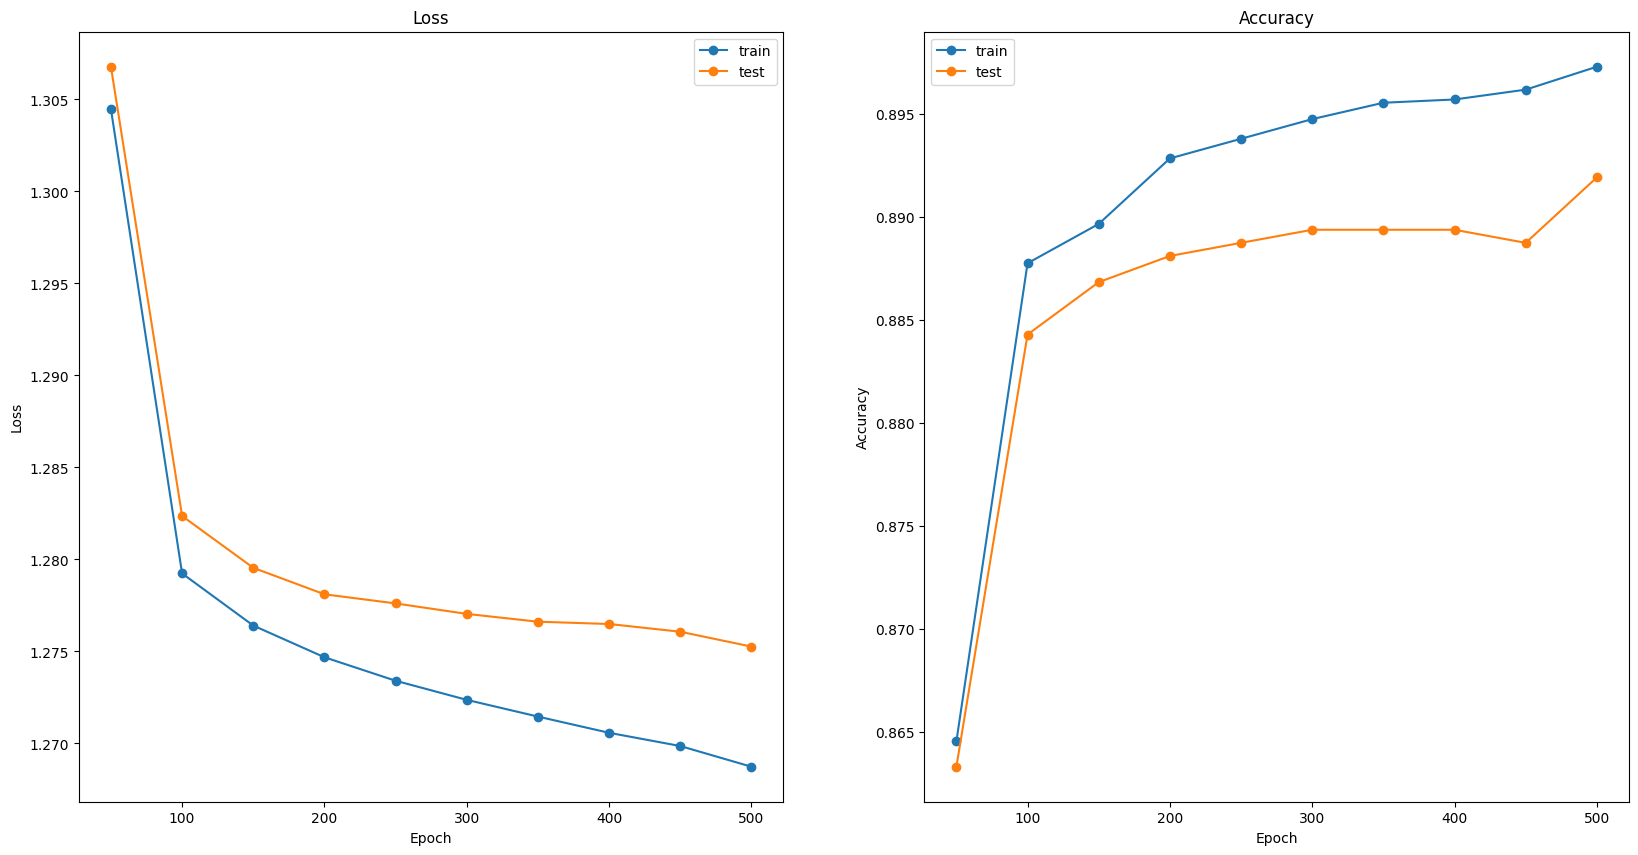

In [456]:
epochs = 500
history = {'epochs': [], 'loss_train': [], 'accuracy_train': [], 'loss_test': [], 'accuracy_test': []}
for i in range(epochs):
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1) % 50 == 0:
        winners = y_pred.argmax(dim=1)
        print(f'Epoch: {i+1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {accuracy_score(y_train, winners):.4f}')
        history['epochs'].append(i+1)
        history['loss_train'].append(loss.item())
        history['accuracy_train'].append(accuracy_score(y_train, winners))
        history['loss_test'].append(criterion(model(X_test_tensor), y_test_tensor).item())
        history['accuracy_test'].append(accuracy_score(y_test, model(X_test_tensor).argmax(1)))
        
# show the accuracy and loss for the test set
print(f'Train Accuracy: {accuracy_score(y_train, model(X_train_tensor).argmax(1)):.4f} Train Loss: {criterion(model(X_train_tensor), y_train_tensor):.4f}')
print(f'Test Accuracy: {accuracy_score(y_test, model(X_test_tensor).argmax(1)):.4f} Test Loss: {criterion(model(X_test_tensor), y_test_tensor):.4f}')
plot_learning_curve(history)

## Results
* Considering my results and results of my coleagues that used all the features and didnt delete the outliers, I think maybe my approach was too aggresive.
<table>
    <tr>
        <th>Data</th>
        <th>Accuracy</th>
        <th>Loss</th>
    </tr>
    <tr>
        <td>Test</td>
        <td>88.95%</td>
        <td>1.273</td>
    </tr>
    <tr>
        <td>Train</td>
        <td>90.40%</td>
        <td>1.262</td>
    </tr>
</table>


## Tensorflow

In [457]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

### Data Preparation
* Already know what to do from PyTorch
* Its the same thing, copy paste

In [458]:
df = pd.read_csv('Lecture_10_Dry_Bean_Dataset.csv')
df['Class'] = df['Class'].astype('category').cat.codes  # convert to categorical codes
X = df.drop('Class', axis=1)
y = df['Class']
undersampler = RandomUnderSampler(sampling_strategy='majority')
X, y = undersampler.fit_resample(X, y)
Xscaled = StandardScaler().fit_transform(X)
X = pd.DataFrame(Xscaled, columns=X.columns)
# remove outliers that are more than 2 standard deviations from the mean
X:pd.DataFrame = X[(np.abs(X) < 2).all(axis=1)]
indexes = X.index
y = y[indexes]
X = X.drop(['Area', 'EquivDiameter', 'Solidity', 'Extent', 'ShapeFactor4'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [459]:
class NeuralNetwork(keras.Model):
    
    def __init__(self, input:int, output:int) -> None:
        """
        """
        super(NeuralNetwork, self).__init__()
        self.fc_layers = keras.models.Sequential([
            keras.layers.Dense(input*2, activation='relu', input_shape=(input,)),
            # keras.layers.Dense(8, activation='relu'),
            # keras.layers.Dense(output, activation='softmax')
            keras.layers.Dense(output, activation='softmax')
        ])

    def call(self, x):
        return self.fc_layers(x)

In [460]:
nn = NeuralNetwork(input=X_train.shape[1], output=7)
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)  # i set verbose to 0 because i dont want to print, also this makes the training faster
loss, accuracy = nn.evaluate(X_test, y_test)
loss_train, accuracy_train = nn.evaluate(X_train, y_train)
print(f'Train Accuracy: {accuracy_train:.4f} Train Loss: {loss_train:.4f}')
print(f'Test Accuracy: {accuracy:.4f} Test Loss: {loss:.4f}')

Epoch 1/100
198/198 [==============================] - 1s 2ms/step - loss: 1.1871 - accuracy: 0.7223 - val_loss: 0.7007 - val_accuracy: 0.8491
Epoch 2/100
198/198 [==============================] - 0s 1ms/step - loss: 0.5335 - accuracy: 0.8576 - val_loss: 0.4368 - val_accuracy: 0.8757
Epoch 3/100
198/198 [==============================] - 0s 1ms/step - loss: 0.3881 - accuracy: 0.8834 - val_loss: 0.3560 - val_accuracy: 0.8954
Epoch 4/100
198/198 [==============================] - 0s 1ms/step - loss: 0.3332 - accuracy: 0.9001 - val_loss: 0.3158 - val_accuracy: 0.9081
Epoch 5/100
198/198 [==============================] - 0s 1ms/step - loss: 0.3051 - accuracy: 0.9031 - val_loss: 0.2989 - val_accuracy: 0.9023
Epoch 6/100
198/198 [==============================] - 0s 1ms/step - loss: 0.2904 - accuracy: 0.9048 - val_loss: 0.2842 - val_accuracy: 0.9081
Epoch 7/100
198/198 [==============================] - 0s 1ms/step - loss: 0.2813 - accuracy: 0.9080 - val_loss: 0.2766 - val_accuracy: 0.9106